# Coding Exercises (Part 4)

## Time Series Data

### Exercise 17: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [10]:
stocks = pd.read_csv('us_stocks.csv', header = [0,1], parse_dates = [0], index_col = 0)
stocks

Open                                                \
                  AXP          FB       INTC         MCD         PG   
Date                                                                  
2009-12-31  40.900002         NaN  20.600000   62.970001  61.520000   
2010-01-04  40.810001         NaN  20.790001   62.630001  61.110001   
2010-01-05  40.830002         NaN  20.940001   62.660000  61.130001   
2010-01-06  41.230000         NaN  20.809999   62.200001  60.939999   
2010-01-07  41.259998         NaN  20.730000   61.250000  60.580002   
...               ...         ...        ...         ...        ...   
2018-12-21  95.199997  133.389999  45.750000  173.529999  90.610001   
2018-12-24  90.739998  123.099998  44.630001  174.240005  90.449997   
2018-12-26  89.849998  126.000000  44.000000  170.089996  87.419998   
2018-12-27  92.360001  132.440002  45.619999  173.289993  89.610001   
2018-12-28  95.400002  135.339996  46.509998  176.300003  92.559998   

                            High                                     ...  \
                  WMT        AXP          FB       INTC         MCD  ...   
Date                                                                 ...   
2009-12-31  54.250000  41.080002         NaN  20.719999   63.070000  ...   
2010-01-04  53.740002  41.099998         NaN  21.030001   63.070000  ...   
2010-01-05  54.090000  41.230000         NaN  20.990000   62.750000  ...   
2010-01-06  53.500000  41.669998         NaN  20.930000   62.410000  ...   
2010-01-07  53.720001  42.240002         NaN  20.760000   62.340000  ...   
...               ...        ...         ...        ...         ...  ...   
2018-12-21  86.870003  96.629997  134.899994  46.650002  177.649994  ...   
2018-12-24  86.540001  91.550003  129.740005  45.169998  175.270004  ...   
2018-12-26  86.419998  93.889999  134.240005  46.200001  174.039993  ...   
2018-12-27  89.750000  94.680000  134.990005  46.380001  175.710007  ...   
2018-12-28  92.070000  95.650002  135.919998  47.740002  177.500000  ...   

            Adj Close                                      Volume              \
                 INTC         MCD         PG        WMT       AXP          FB   
Date                                                                            
2009-12-31  15.252899   47.055138  45.146072  42.548668   4030500         NaN   
2010-01-04  15.611791   47.311375  45.510941  43.169579   6894300         NaN   
2010-01-05  15.604316   46.949627  45.525822  42.739723  10641200         NaN   
2010-01-06  15.551979   46.309067  45.309883  42.644184   8399400         NaN   
2010-01-07  15.402434   46.648193  45.064171  42.668079   8981700         NaN   
...               ...         ...        ...        ...       ...         ...   
2018-12-21  44.557564  174.149994  90.256142  87.129997  11005300  56901500.0   
2018-12-24  43.315437  170.279999  86.674469  85.820000   3190900  22066000.0   
2018-12-26  45.899059  174.029999  89.383041  90.410004   5383700  39723400.0   
2018-12-27  46.067993  175.710007  91.297897  91.589996   4226600  31202500.0   
2018-12-28  46.455536  175.559998  90.464493  92.129997   3225100  22627600.0   

                                                    
                INTC       MCD        PG       WMT  
Date                                                
2009-12-31  26429200   4495300   5942200   9764800  
2010-01-04  47800900   5839300   9190800  20753100  
2010-01-05  52357700   7099000   8649400  15648400  
2010-01-06  40037400  10551300   9908400  12517200  
2010-01-07  54041500   7517700   8972800  10662700  
...              ...       ...       ...       ...  
2018-12-21  52768300   8536900  24030000  14921500  
2018-12-24  19241600   2400900   7396300   6110300  
2018-12-26  28677600   4065500   8630900  10028300  
2018-12-27  29970700   3934500  11360100   9881500  
2018-12-28  24758700   2896800   9611800   9874000  

[2264 rows x 36 columns]

In [15]:
a = pd.date_range(start = '2015-12-31', end = '2018-12-31' , freq = 'D')

In [17]:
stocks = stocks.reindex(a)

In [19]:
stocks = stocks.loc[:,'Adj Close']

In [22]:
stocks.fillna(method = 'ffill', inplace = True)

__Visualize__ the Adjusted Close of the six stocks __over time__!

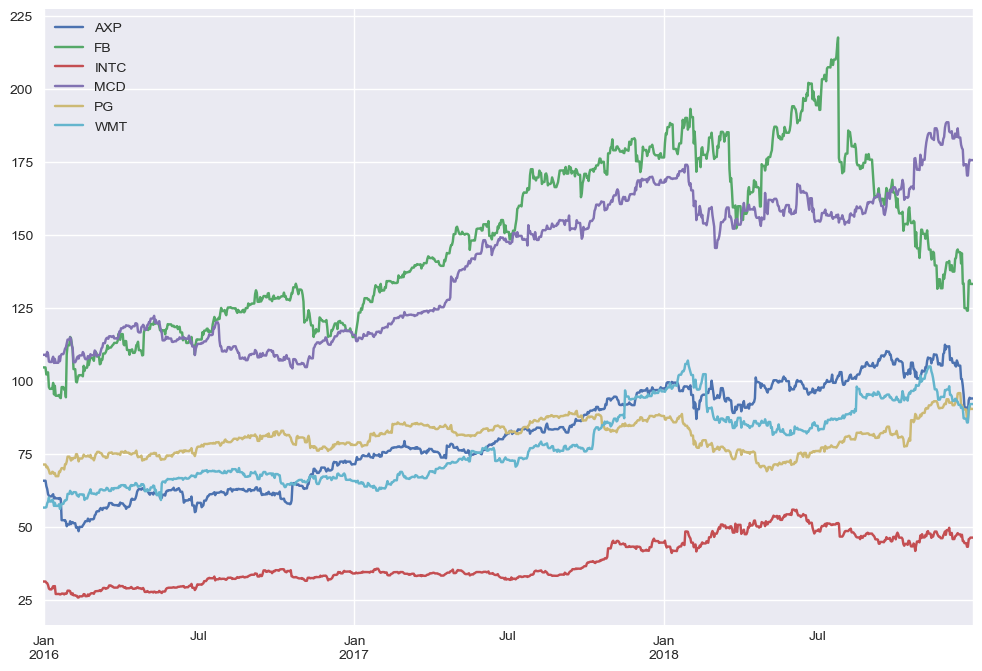

In [23]:
stocks.plot(figsize = (12,8))
plt.show()

__Visualize__ the Adjusted Close of the six stocks __over time__, starting each at the __Base Value 100__!

In [24]:
stocks_100 = stocks.div(stocks.iloc[0]).mul(100)

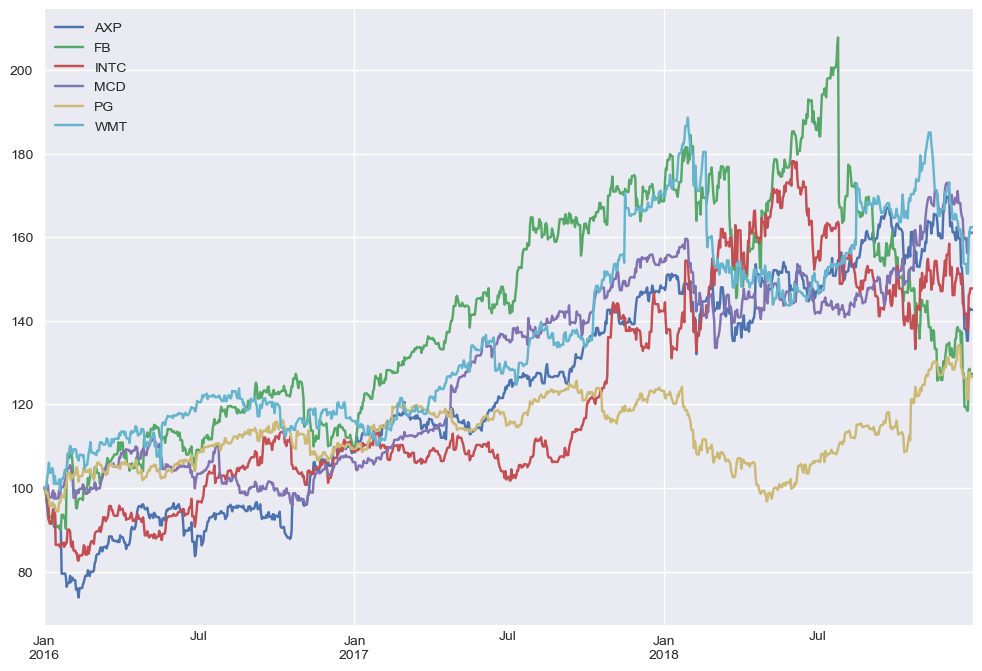

In [25]:
stocks_100.plot(figsize = (12,8))
plt.show()

Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [26]:
stock = stocks

In [30]:
returns = stock.resample('BM').last()

Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [34]:
returns = returns.pct_change().dropna()

In [42]:
summ = returns.describe().T.iloc[:, [1,2]]

In [44]:
summ

,mean,std
AXP,0.012162,0.065456
FB,0.008656,0.063183
INTC,0.012559,0.058963
MCD,0.014179,0.041817
PG,0.007358,0.039945
WMT,0.014997,0.054054


In [45]:
summ["mean"] = summ["mean"]*12
summ["std"] = summ["std"]*np.sqrt(12)

In [46]:
summ

,mean,std
AXP,0.145942,0.226748
FB,0.103868,0.218871
INTC,0.150712,0.204255
MCD,0.170144,0.144859
PG,0.088297,0.138374
WMT,0.179962,0.187247


__Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

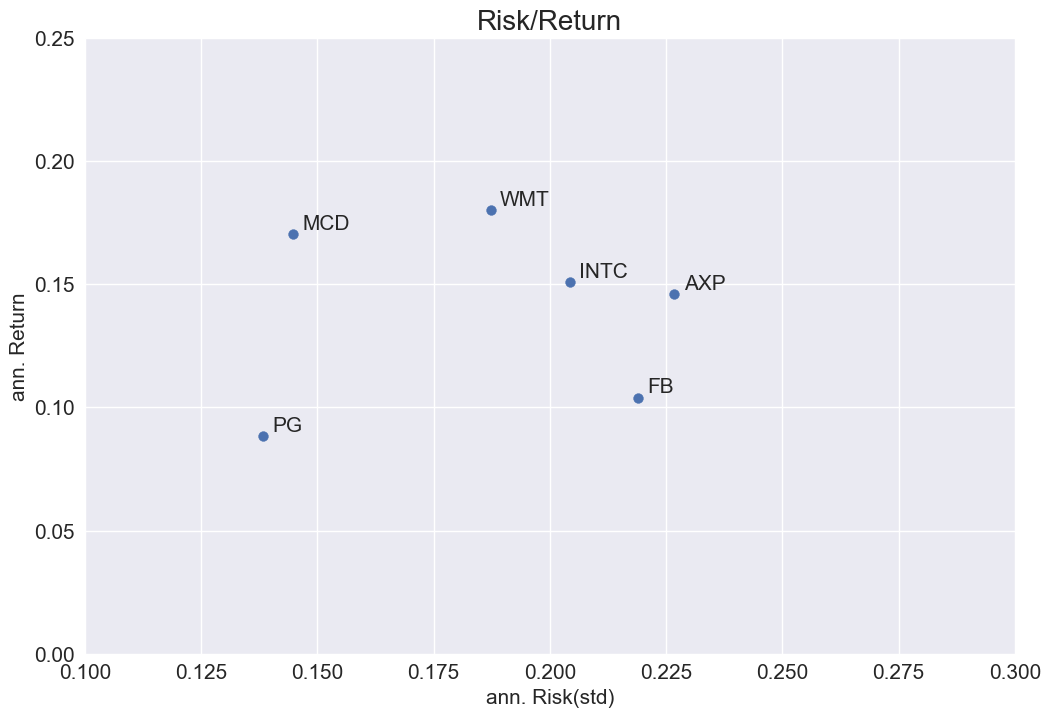

In [47]:
summ.plot(kind = "scatter", x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summ.index:
    plt.annotate(i, xy=(summ.loc[i, "std"]+0.002, summ.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Reindex__ the DataFrame __stocks__ with all __365 calander days of 2018__. Fill NaN Values!

In [50]:
b = pd.date_range(start = '2018-01-01', end = '2018-12-31' , freq = 'D')
stocks = stocks.reindex(b)

In [51]:
stocks

,AXP,FB,INTC,MCD,PG,WMT
2018-01-01,97.485764,176.460007,44.743317,167.868698,88.055237,96.460487
2018-01-02,97.122566,181.419998,45.412144,168.941528,86.876450,96.304199
2018-01-03,97.721367,184.669998,43.870941,168.229553,86.771019,97.144257
2018-01-04,99.346771,184.330002,43.066414,169.409668,87.384384,97.232178
2018-01-05,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
...,...,...,...,...,...,...
2018-12-27,94.294075,134.520004,46.067993,175.710007,91.297897,91.589996
2018-12-28,94.035133,133.199997,46.455536,175.559998,90.464493,92.129997
2018-12-29,94.035133,133.199997,46.455536,175.559998,90.464493,92.129997
2018-12-30,94.035133,133.199997,46.455536,175.559998,90.464493,92.129997


__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

154. __Import__ daily stock price data (__us_stocks.csv__) and __insepct__! Handle the __MultiIndex__! __Fill in the gaps__!

In [ ]:
stocks = pd.read_csv(---, header = [---, ---], index_col= [---], parse_dates= [---])

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

155. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are now in the DataFrame?

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

156. __Plot__ stocks (figsize (12, 8)!

157. __Bring__ the six stocks to the __same Base__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.---(stocks.iloc[0]).---(figsize = (12, 8))
plt.show()

Still hard to compare performance, right?

158. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month)! __Save__ resampled Dataframe in the variable __stocks_m__!

In [ ]:
# run the cell!
stocks_m.head()

159. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
#run the cell!
ret

160. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.---.T.iloc[:, [1,2]]

In [ ]:
#run the cell!
summary

161. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"] * ---
summary["std"] = summary["std"] * ---

In [ ]:
#run the cell!
summary

162. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = ---, x = ---, y = ---, figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance and facebook the worst performance!

Next, let´s return a DataFrame with stock price information for __all 365 days__ in the year __2018__.

163. First, create a __new DatetimeIndex__ (year_2018) with __all 365 days__/timestamps in the year __2018__!

In [ ]:
# run the cell!
year_2018

In [ ]:
# run the cell!
stocks.head()

164. Second, __reindex__ the stocks DataFrame accordingly! Use the most appropriate __method__ to __fill NaNs__!

# Well Done!

-------------------

# Hints (Spoiler!)

154. The first two rows (index pos. 0 & 1) form the Columns MultiIndex. The Column with Datetime information is at index pos. 0.

155. stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

156. plot() method


157. div() method, plot() method

158. resample() method, last() method, use "BM" (month end business day)

159. pct_change() method, dropna() method

160. describe() method

161. *12 and *np.sqrt(12)

162. scatterplot, std and mean

163. pd.date_range() method

164. reindex() method, ffill